In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
data_dir = "/Users/gbromley/"
mod_data = 'usgs_wrf_run/wrfout_d01_2015-05-21_00:00:00'
unmod_data = 'wrfout_d01_2015-05-21_00:00:00.no_change.nc'

In [ ]:
md

In [3]:
md = xr.open_dataset(data_dir+mod_data)
ud = xr.open_dataset(data_dir+unmod_data)

In [4]:
sel_time = 20

In [9]:
test = md['T2'] - ud['T2']

In [13]:
test

<xarray.DataArray 'T2' (Time: 81, south_north: 99, west_east: 99)>
array([[[  0.000000e+00,   0.000000e+00, ...,   0.000000e+00,   0.000000e+00],
        [  0.000000e+00,   0.000000e+00, ...,   0.000000e+00,   0.000000e+00],
        ..., 
        [  0.000000e+00,   0.000000e+00, ...,   0.000000e+00,   0.000000e+00],
        [  0.000000e+00,   0.000000e+00, ...,   0.000000e+00,   0.000000e+00]],

       [[  4.699707e-03,   1.983643e-03, ...,   1.220703e-04,   0.000000e+00],
        [  5.706787e-03,   4.272461e-04, ...,   4.516602e-03,   2.502441e-03],
        ..., 
        [  7.324219e-04,  -5.187988e-03, ...,   2.288818e-02,  -8.392334e-03],
        [ -1.718140e-01,  -9.109497e-02, ...,  -3.295898e-03,  -9.429932e-03]],

       ..., 
       [[ -2.787170e-01,  -2.315369e-01, ...,  -3.598022e-02,  -4.058838e-03],
        [ -2.496643e-01,  -1.860046e-01, ...,  -1.876831e-02,   1.501465e-02],
        ..., 
        [ -3.906250e-03,  -4.455566e-03, ...,  -1.405029e-01,  -3.710938e-02],
     

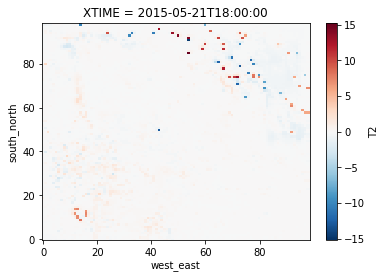

In [19]:
test.sel(Time=6).plot()

In [7]:
test = ud['IVGTYP']-md['IVGTYP']

(array([   1944.,       0.,  183789.,   24786.,   18468.,   38475.,
         208818.,  131625.,  175365.,   10611.]),
 array([-23. , -19.2, -15.4, -11.6,  -7.8,  -4. ,  -0.2,   3.6,   7.4,
         11.2,  15. ]),
 <a list of 10 Patch objects>)

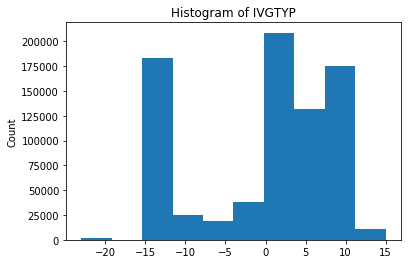

In [ ]:
test = md['LANDUSEF'].sel(land_cat_stag=9)
fallow = md['LANDUSEF'].sel(land_cat_stag=16)

In [ ]:
t_sav = test.where(test.values > 0.3)-0.4

In [ ]:
t_fal = fallow.where(test.values > 0.3)+0.4

In [ ]:
md['LANDUSEF'][0,9,:,:]=t_sav

In [ ]:
md['LANDUSEF'][0,16,:,:]=t_fal

In [ ]:
md['LANDUSEF'].sel(land_cat_stag=16).plot()

In [ ]:
md.to_netcdf('modified_wrf_input.nc')

In [ ]:
 testing = md['LANDUSEF'] - ud['LANDUSEF']

In [ ]:
test = md['MAPFAC_U'].attrs

In [ ]:
test.popitem()

In [ ]:
md['MAPFAC_U'].attrs = test

In [ ]:
md['FSA'].attrs

In [ ]:
md['MAPFAC_U'].attrs = md['MAPFAC_U'].attrs.popitem()

In [ ]:
md.to_netcdf('modified_wrf_input.nc')